In [1]:
!git clone https://github.com/yohanesnuwara/SCAN

Cloning into 'SCAN'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 30 (delta 9), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 22.11 KiB | 1.58 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
df = pd.read_csv("/content/SCAN/data/classification_NPK.csv")

df

,Crop age,Phase,N,P,K,Value N,Value P,Value K
0,0-2.5 year,Vegetative Phase,Very low,Very low,Very low,0-15.9,0-15.9,0-12.4
1,0-2.5 year,Vegetative Phase,Low,Low,Low,16-17.9,16-17.9,12.5-13.9
2,0-2.5 year,Vegetative Phase,Enough,Enough,Enough,18-20,18-20,14-14.5
3,0-2.5 year,Vegetative Phase,Too much,Too much,Too much,21-100,21-100,14.6-100
4,2.6-4 year,Vegetative Phase,Very low,Very low,Very low,0-15.9,0-15,0-15
5,2.6-4 year,Vegetative Phase,Low,Low,Low,16-16.4,15.1-17.4,15.1-17.4
6,2.6-4 year,Vegetative Phase,Enough,Enough,Enough,16.5-16.9,17.5-18,17.5-18
7,2.6-4 year,Vegetative Phase,Too much,Too much,Too much,17-100,18.1-100,18.1-100
8,4-7 year,Flowering Phase,Very low,Very low,Very low,0-13.1,0-17,0-15.9
9,4-7 year,Flowering Phase,Low,Low,Low,13.2-15.3,17.1-19.4,16-16.4


In [4]:
# create lower and upper bound of each nutrient (kg/ha)
df["LB_N"] = [float(x.split("-")[0]) for x in df["Value N"]]
df["LB_P"] = [float(x.split("-")[0]) for x in df["Value P"]]
df["LB_K"] = [float(x.split("-")[0]) for x in df["Value K"]]

df["UB_N"] = [float(x.split("-")[1]) for x in df["Value N"]]
df["UB_P"] = [float(x.split("-")[1]) for x in df["Value P"]]
df["UB_K"] = [float(x.split("-")[1]) for x in df["Value K"]]

df

,Crop age,Phase,N,P,K,Value N,Value P,Value K,LB_N,LB_P,LB_K,UB_N,UB_P,UB_K
0,0-2.5 year,Vegetative Phase,Very low,Very low,Very low,0-15.9,0-15.9,0-12.4,0.0,0.0,0.0,15.9,15.9,12.4
1,0-2.5 year,Vegetative Phase,Low,Low,Low,16-17.9,16-17.9,12.5-13.9,16.0,16.0,12.5,17.9,17.9,13.9
2,0-2.5 year,Vegetative Phase,Enough,Enough,Enough,18-20,18-20,14-14.5,18.0,18.0,14.0,20.0,20.0,14.5
3,0-2.5 year,Vegetative Phase,Too much,Too much,Too much,21-100,21-100,14.6-100,21.0,21.0,14.6,100.0,100.0,100.0
4,2.6-4 year,Vegetative Phase,Very low,Very low,Very low,0-15.9,0-15,0-15,0.0,0.0,0.0,15.9,15.0,15.0
5,2.6-4 year,Vegetative Phase,Low,Low,Low,16-16.4,15.1-17.4,15.1-17.4,16.0,15.1,15.1,16.4,17.4,17.4
6,2.6-4 year,Vegetative Phase,Enough,Enough,Enough,16.5-16.9,17.5-18,17.5-18,16.5,17.5,17.5,16.9,18.0,18.0
7,2.6-4 year,Vegetative Phase,Too much,Too much,Too much,17-100,18.1-100,18.1-100,17.0,18.1,18.1,100.0,100.0,100.0
8,4-7 year,Flowering Phase,Very low,Very low,Very low,0-13.1,0-17,0-15.9,0.0,0.0,0.0,13.1,17.0,15.9
9,4-7 year,Flowering Phase,Low,Low,Low,13.2-15.3,17.1-19.4,16-16.4,13.2,17.1,16.0,15.3,19.4,16.4


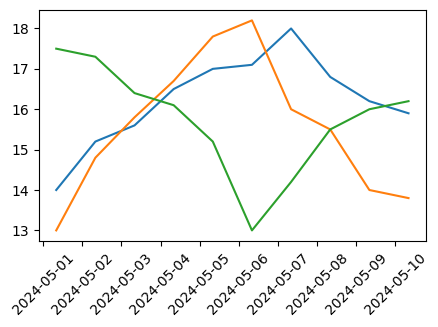

In [5]:
sector = np.full(10, 'A')

start_timestamp = np.datetime64('2024-05-01T08:00')
date = np.array([start_timestamp + np.timedelta64(i, 'D') for i in range(10)])

sensor_N = [14, 15.2, 15.6, 16.5, 17, 17.1, 18, 16.8, 16.2, 15.9]
sensor_P = [13, 14.8, 15.8, 16.7, 17.8, 18.2, 16, 15.5, 14, 13.8]
sensor_K = [17.5, 17.3, 16.4, 16.1, 15.2, 13, 14.2, 15.5, 16, 16.2]

plt.figure(figsize=(5,3))
plt.plot(date,sensor_N)
plt.plot(date,sensor_P)
plt.plot(date,sensor_K)
plt.xticks(rotation=45)
plt.show()

In [6]:
df_sensor_A = pd.DataFrame({'Sector': sector, 'Date': date,
                          'Value N': sensor_N, 'Value P': sensor_P, 'Value K': sensor_K})

df_sensor_A

,Sector,Date,Value N,Value P,Value K
0,A,2024-05-01 08:00:00,14.0,13.0,17.5
1,A,2024-05-02 08:00:00,15.2,14.8,17.3
2,A,2024-05-03 08:00:00,15.6,15.8,16.4
3,A,2024-05-04 08:00:00,16.5,16.7,16.1
4,A,2024-05-05 08:00:00,17.0,17.8,15.2
5,A,2024-05-06 08:00:00,17.1,18.2,13.0
6,A,2024-05-07 08:00:00,18.0,16.0,14.2
7,A,2024-05-08 08:00:00,16.8,15.5,15.5
8,A,2024-05-09 08:00:00,16.2,14.0,16.0
9,A,2024-05-10 08:00:00,15.9,13.8,16.2


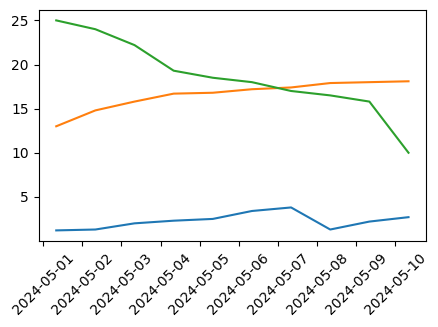

In [7]:
sector = np.full(10, 'B')

start_timestamp = np.datetime64('2024-05-01T08:00')
date = np.array([start_timestamp + np.timedelta64(i, 'D') for i in range(10)])

sensor_N = [1.2, 1.3, 2, 2.3, 2.5, 3.4, 3.8, 1.3, 2.2, 2.7]
sensor_P = [13, 14.8, 15.8, 16.7, 16.8, 17.2, 17.4, 17.9, 18, 18.1]
sensor_K = [25, 24, 22.2, 19.3, 18.5, 18, 17, 16.5, 15.8, 10]

plt.figure(figsize=(5,3))
plt.plot(date,sensor_N)
plt.plot(date,sensor_P)
plt.plot(date,sensor_K)
plt.xticks(rotation=45)
plt.show()

In [8]:
df_sensor_B = pd.DataFrame({'Sector': sector, 'Date': date,
                          'Value N': sensor_N, 'Value P': sensor_P, 'Value K': sensor_K})

df_sensor = pd.concat((df_sensor_A, df_sensor_B), axis=0)

df_sensor

,Sector,Date,Value N,Value P,Value K
0,A,2024-05-01 08:00:00,14.0,13.0,17.5
1,A,2024-05-02 08:00:00,15.2,14.8,17.3
2,A,2024-05-03 08:00:00,15.6,15.8,16.4
3,A,2024-05-04 08:00:00,16.5,16.7,16.1
4,A,2024-05-05 08:00:00,17.0,17.8,15.2
5,A,2024-05-06 08:00:00,17.1,18.2,13.0
6,A,2024-05-07 08:00:00,18.0,16.0,14.2
7,A,2024-05-08 08:00:00,16.8,15.5,15.5
8,A,2024-05-09 08:00:00,16.2,14.0,16.0
9,A,2024-05-10 08:00:00,15.9,13.8,16.2


In [9]:
df_sensor.to_csv('sensor.csv', index=False)

In [10]:
# Create lists to store data
crop_age_list = []
phase_list = []

# Iterate over unique values of "Crop age" and "Phase"
for i in df["Crop age"].unique():
    for j in df["Phase"].unique():
        crop_age_list.extend(np.full(300, i))
        phase_list.extend(np.full(300, j))

# Create DataFrame
data = {"Crop age": crop_age_list, "Phase": phase_list}
df_new = pd.DataFrame(data)

df_new

,Crop age,Phase
0,0-2.5 year,Vegetative Phase
1,0-2.5 year,Vegetative Phase
2,0-2.5 year,Vegetative Phase
3,0-2.5 year,Vegetative Phase
4,0-2.5 year,Vegetative Phase
...,...,...
5995,10-100 year,Riping Phase
5996,10-100 year,Riping Phase
5997,10-100 year,Riping Phase
5998,10-100 year,Riping Phase


In [11]:
# Create lists to store data
crop_age_list = []
phase_list = []

# Iterate over unique values of "Crop age" and "Phase"
for i in df["Crop age"].unique():
    for j in df["Phase"].unique():
        crop_age_list.extend(np.full(300, i))
        phase_list.extend(np.full(300, j))

# Create DataFrame
data = {"Crop age": crop_age_list, "Phase": phase_list}
df_new = pd.DataFrame(data)

# Generate random NPK
df_new["Value N"] = np.random.uniform(1,50,6000).round()
df_new["Value P"] = np.random.uniform(1,50,6000).round()
df_new["Value K"] = np.random.uniform(1,50,6000).round()


df_new

,Crop age,Phase,Value N,Value P,Value K
0,0-2.5 year,Vegetative Phase,36.0,19.0,19.0
1,0-2.5 year,Vegetative Phase,48.0,50.0,36.0
2,0-2.5 year,Vegetative Phase,30.0,28.0,44.0
3,0-2.5 year,Vegetative Phase,8.0,20.0,2.0
4,0-2.5 year,Vegetative Phase,13.0,27.0,3.0
...,...,...,...,...,...
5995,10-100 year,Riping Phase,39.0,10.0,12.0
5996,10-100 year,Riping Phase,26.0,17.0,15.0
5997,10-100 year,Riping Phase,47.0,7.0,24.0
5998,10-100 year,Riping Phase,2.0,21.0,36.0


In [12]:
df1 = df[["Crop age", "Phase", "LB_N", "UB_N", "N"]]
df2 = df_new[["Crop age", "Phase", "Value N"]]

# Function to get category for each value in df2
def get_category(row):
    category = None
    for index, df1_row in df1.iterrows():
        if (df1_row['LB_N'] <= row['Value N'] <= df1_row['UB_N']) and (row['Phase'] == df1_row['Phase']) and (row['Crop age'] == df1_row['Crop age']):
            category = df1_row['N']
            break
    return category

# Apply function to get categories
df2['category N'] = df2.apply(get_category, axis=1)
df2_N = df2.copy()

df2_N

<ipython-input-12-6821404164e9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category N'] = df2.apply(get_category, axis=1)


,Crop age,Phase,Value N,category N
0,0-2.5 year,Vegetative Phase,36.0,Too much
1,0-2.5 year,Vegetative Phase,48.0,Too much
2,0-2.5 year,Vegetative Phase,30.0,Too much
3,0-2.5 year,Vegetative Phase,8.0,Very low
4,0-2.5 year,Vegetative Phase,13.0,Very low
...,...,...,...,...
5995,10-100 year,Riping Phase,39.0,Too much
5996,10-100 year,Riping Phase,26.0,Too much
5997,10-100 year,Riping Phase,47.0,Too much
5998,10-100 year,Riping Phase,2.0,Very low


In [13]:
df1 = df[["Crop age", "Phase", "LB_P", "UB_P", "P"]]
df2 = df_new[["Crop age", "Phase", "Value P"]]

# Function to get category for each value in df2
def get_category(row):
    category = None
    for index, df1_row in df1.iterrows():
        if (df1_row['LB_P'] <= row['Value P'] <= df1_row['UB_P']) and (row['Phase'] == df1_row['Phase']) and (row['Crop age'] == df1_row['Crop age']):
            category = df1_row['P']
            break
    return category

# Apply function to get categories
df2['category P'] = df2.apply(get_category, axis=1)
df2_P = df2.copy()

df2_P

<ipython-input-13-366f5ad2a422>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category P'] = df2.apply(get_category, axis=1)


,Crop age,Phase,Value P,category P
0,0-2.5 year,Vegetative Phase,19.0,Enough
1,0-2.5 year,Vegetative Phase,50.0,Too much
2,0-2.5 year,Vegetative Phase,28.0,Too much
3,0-2.5 year,Vegetative Phase,20.0,Enough
4,0-2.5 year,Vegetative Phase,27.0,Too much
...,...,...,...,...
5995,10-100 year,Riping Phase,10.0,Very low
5996,10-100 year,Riping Phase,17.0,Very low
5997,10-100 year,Riping Phase,7.0,Very low
5998,10-100 year,Riping Phase,21.0,Enough


In [14]:
df1 = df[["Crop age", "Phase", "LB_K", "UB_K", "K"]]
df2 = df_new[["Crop age", "Phase", "Value K"]]

# Function to get category for each value in df2
def get_category(row):
    category = None
    for index, df1_row in df1.iterrows():
        if (df1_row['LB_K'] <= row['Value K'] <= df1_row['UB_K']) and (row['Phase'] == df1_row['Phase']) and (row['Crop age'] == df1_row['Crop age']):
            category = df1_row['K']
            break
    return category

# Apply function to get categories
df2['category K'] = df2.apply(get_category, axis=1)
df2_K = df2.copy()

df2_K

<ipython-input-14-2aacfbd4a6b8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['category K'] = df2.apply(get_category, axis=1)


,Crop age,Phase,Value K,category K
0,0-2.5 year,Vegetative Phase,19.0,Too much
1,0-2.5 year,Vegetative Phase,36.0,Too much
2,0-2.5 year,Vegetative Phase,44.0,Too much
3,0-2.5 year,Vegetative Phase,2.0,Very low
4,0-2.5 year,Vegetative Phase,3.0,Very low
...,...,...,...,...
5995,10-100 year,Riping Phase,12.0,Low
5996,10-100 year,Riping Phase,15.0,Enough
5997,10-100 year,Riping Phase,24.0,None
5998,10-100 year,Riping Phase,36.0,Too much


In [15]:
# concat
df_synthetic = pd.concat((df2_N, df2_P.iloc[:,2:], df2_K.iloc[:,2:]), axis=1)
df_synthetic.replace("None", pd.NA, inplace=True)
df_synthetic.dropna(inplace=True)

# Create dictionary of labels
crop_dict = {element: idx + 1 for idx, element in enumerate(df['Crop age'].unique())}
phase_dict = {element: idx + 1 for idx, element in enumerate(df['Phase'].unique())}
N_dict = {element: idx + 1 for idx, element in enumerate(df['N'].unique())}
P_dict = {element: idx + 1 for idx, element in enumerate(df['P'].unique())}
K_dict = {element: idx + 1 for idx, element in enumerate(df['K'].unique())}


# map
df_synthetic['Crop age'] = df_synthetic['Crop age'].map(crop_dict)
df_synthetic['Phase'] = df_synthetic['Phase'].map(phase_dict)
# df_synthetic['category N'] = df_synthetic['category N'].map(N_dict)
# df_synthetic['category P'] = df_synthetic['category P'].map(P_dict)
# df_synthetic['category K'] = df_synthetic['category K'].map(K_dict)


df_synthetic

,Crop age,Phase,Value N,category N,Value P,category P,Value K,category K
0,1,1,36.0,Too much,19.0,Enough,19.0,Too much
1,1,1,48.0,Too much,50.0,Too much,36.0,Too much
2,1,1,30.0,Too much,28.0,Too much,44.0,Too much
3,1,1,8.0,Very low,20.0,Enough,2.0,Very low
4,1,1,13.0,Very low,27.0,Too much,3.0,Very low
...,...,...,...,...,...,...,...,...
5994,5,4,8.0,Very low,33.0,Too much,38.0,Too much
5995,5,4,39.0,Too much,10.0,Very low,12.0,Low
5996,5,4,26.0,Too much,17.0,Very low,15.0,Enough
5998,5,4,2.0,Very low,21.0,Enough,36.0,Too much


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df_synthetic, test_size=0.2, random_state=2)
train, val = train_test_split(train, test_size=0.2, random_state=23)

train

,Crop age,Phase,Value N,category N,Value P,category P,Value K,category K
4002,4,2,40.0,Too much,24.0,Too much,32.0,Too much
5774,5,4,43.0,Too much,17.0,Very low,43.0,Too much
2854,3,2,12.0,Very low,22.0,Too much,37.0,Too much
2927,3,2,46.0,Too much,47.0,Too much,24.0,Too much
247,1,1,26.0,Too much,29.0,Too much,25.0,Too much
...,...,...,...,...,...,...,...,...
5918,5,4,26.0,Too much,9.0,Very low,50.0,Too much
2846,3,2,8.0,Very low,37.0,Too much,23.0,Too much
5611,5,3,5.0,Very low,28.0,Too much,47.0,Too much
3167,3,3,33.0,Too much,37.0,Too much,9.0,Very low


In [44]:
from sklearn.preprocessing import LabelEncoder

target_column = ['category N', 'category P', 'category K', 'Value P', 'Value K']

train_x = train.drop(columns=target_column)
val_x = val.drop(columns=target_column)
test_x = test.drop(columns=target_column)

train_y = train['category N']
train_y = pd.get_dummies(train_y, prefix='valueN').astype(int)
val_y = val['category N']
val_y = pd.get_dummies(val_y, prefix='valueN').astype(int)
test_y = test['category N']
test_y = pd.get_dummies(test_y, prefix='valueN').astype(int)

train_y

,valueN_Enough,valueN_Low,valueN_Too much,valueN_Very low
4059,0,0,1,0
3905,0,1,0,0
5180,0,0,0,1
160,0,0,1,0
4008,0,0,1,0
...,...,...,...,...
5853,0,0,1,0
4579,1,0,0,0
5621,0,0,0,1
3167,0,0,1,0


In [45]:
model = Sequential([
          Dense(300, activation='relu',kernel_initializer='normal', input_shape=(3,)),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(250, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(200, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(150, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(100, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(50, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(4, activation='softmax')]
)

opt = 'adam'
# opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy')

model_checkpoint = ModelCheckpoint('best_model', monitor='val_loss', mode='min',
                                   save_best_only=True, verbose=1)

history = model.fit(train_x, train_y,
                    validation_split=0.2, batch_size=64,
                    epochs=300, callbacks=[model_checkpoint])


Epoch 1/300
25/25 [==============================] - ETA: 0s - loss: 0.7764
Epoch 1: val_loss improved from inf to 0.53883, saving model to best_model
25/25 [==============================] - 4s 90ms/step - loss: 0.7764 - val_loss: 0.5388
Epoch 2/300
25/25 [==============================] - ETA: 0s - loss: 0.4568
Epoch 2: val_loss improved from 0.53883 to 0.37490, saving model to best_model
25/25 [==============================] - 3s 115ms/step - loss: 0.4568 - val_loss: 0.3749
Epoch 3/300
25/25 [==============================] - ETA: 0s - loss: 0.3786
Epoch 3: val_loss improved from 0.37490 to 0.35479, saving model to best_model
25/25 [==============================] - 3s 121ms/step - loss: 0.3786 - val_loss: 0.3548
Epoch 4/300
25/25 [==============================] - ETA: 0s - loss: 0.3676
Epoch 4: val_loss improved from 0.35479 to 0.32200, saving model to best_model
25/25 [==============================] - 2s 79ms/step - loss: 0.3676 - val_loss: 0.3220
Epoch 5/300
22/25 [===========

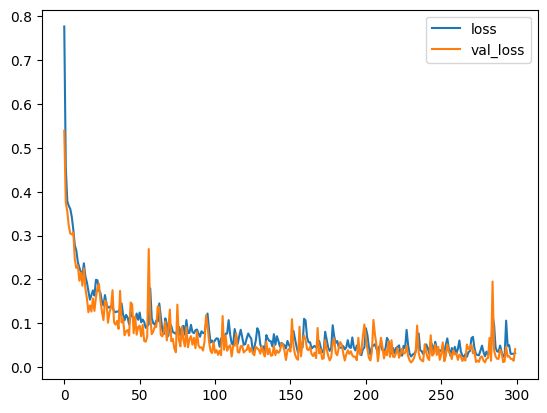

In [46]:
import matplotlib.pyplot as plt

def plot_model_history(history):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(history.history['loss'])
    axes.plot(history.history['val_loss'])
    axes.legend(['loss', 'val_loss'])

plot_model_history(history)

In [51]:
model.save("model_N.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
from sklearn.metrics import confusion_matrix

test_y_encode = np.argmax(test_y, axis=1)
pred_y_encode = np.argmax(model.predict(test_x), axis=1)

confusion_matrix(test_y_encode, pred_y_encode)

20/20 [==============================] - 0s 4ms/step


array([[  4,   4,   1,   0],
       [  0,  16,   0,   0],
       [  1,   0, 424,   0],
       [  0,   2,   0, 170]])

In [55]:
from sklearn.preprocessing import LabelEncoder

target_column = ['category N', 'category P', 'category K', 'Value N', 'Value K']

train_x = train.drop(columns=target_column)
val_x = val.drop(columns=target_column)
test_x = test.drop(columns=target_column)

train_y = train['category P']
train_y = pd.get_dummies(train_y, prefix='valueP').astype(int)
val_y = val['category P']
val_y = pd.get_dummies(val_y, prefix='valueP').astype(int)
test_y = test['category P']
test_y = pd.get_dummies(test_y, prefix='valueP').astype(int)

train_y

,valueP_Enough,valueP_Low,valueP_Too much,valueP_Very low
4059,0,0,1,0
3905,0,0,0,1
5180,0,0,1,0
160,0,0,1,0
4008,0,0,0,1
...,...,...,...,...
5853,0,0,0,1
4579,0,0,1,0
5621,0,0,0,1
3167,0,0,0,1


In [56]:
model = Sequential([
          Dense(300, activation='relu',kernel_initializer='normal', input_shape=(3,)),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(250, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(200, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(150, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(100, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(50, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(4, activation='softmax')]
)

opt = 'adam'
# opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy')

model_checkpoint = ModelCheckpoint('best_model', monitor='val_loss', mode='min',
                                   save_best_only=True, verbose=1)

history = model.fit(train_x, train_y,
                    validation_split=0.2, batch_size=64,
                    epochs=300, callbacks=[model_checkpoint])

Epoch 1/300
24/25 [===========================>..] - ETA: 0s - loss: 0.8266
Epoch 1: val_loss improved from inf to 0.53077, saving model to best_model
25/25 [==============================] - 7s 157ms/step - loss: 0.8144 - val_loss: 0.5308
Epoch 2/300
24/25 [===========================>..] - ETA: 0s - loss: 0.3762
Epoch 2: val_loss improved from 0.53077 to 0.34696, saving model to best_model
25/25 [==============================] - 6s 258ms/step - loss: 0.3721 - val_loss: 0.3470
Epoch 3/300
25/25 [==============================] - ETA: 0s - loss: 0.3209
Epoch 3: val_loss improved from 0.34696 to 0.29325, saving model to best_model
25/25 [==============================] - 2s 93ms/step - loss: 0.3209 - val_loss: 0.2933
Epoch 4/300
21/25 [========================>.....] - ETA: 0s - loss: 0.3170
Epoch 4: val_loss did not improve from 0.29325
25/25 [==============================] - 0s 11ms/step - loss: 0.3089 - val_loss: 0.3007
Epoch 5/300
20/25 [=======================>......] - ETA: 0s -

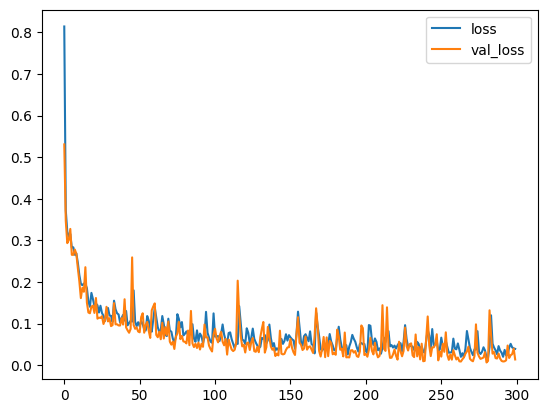

In [57]:
plot_model_history(history)

In [58]:
model.save('model_P.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
from sklearn.metrics import confusion_matrix

test_y_encode = np.argmax(test_y, axis=1)
pred_y_encode = np.argmax(model.predict(test_x), axis=1)

confusion_matrix(test_y_encode, pred_y_encode)

20/20 [==============================] - 0s 2ms/step


array([[ 13,   0,   0,   0],
       [  0,  22,   0,   0],
       [  0,   0, 365,   0],
       [  0,   0,   0, 222]])

In [18]:
from sklearn.preprocessing import LabelEncoder

target_column = ['category N', 'category P', 'category K', 'Value N', 'Value P']

train_x = train.drop(columns=target_column)
val_x = val.drop(columns=target_column)
test_x = test.drop(columns=target_column)

train_y = train['category K']
train_y = pd.get_dummies(train_y, prefix='valueK').astype(int)
val_y = val['category K']
val_y = pd.get_dummies(val_y, prefix='valueK').astype(int)
test_y = test['category K']
test_y = pd.get_dummies(test_y, prefix='valueK').astype(int)

train_y

,valueK_Enough,valueK_Low,valueK_Too much,valueK_Very low
4002,0,0,1,0
5774,0,0,1,0
2854,0,0,1,0
2927,0,0,1,0
247,0,0,1,0
...,...,...,...,...
5918,0,0,1,0
2846,0,0,1,0
5611,0,0,1,0
3167,0,0,0,1


In [19]:
model = Sequential([
          Dense(300, activation='relu',kernel_initializer='normal', input_shape=(3,)),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(250, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(200, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(150, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(100, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(50, kernel_initializer='normal', activation='relu' ),
          # BatchNormalization(),
          Dropout(0.1),
          Dense(4, activation='softmax')]
)

opt = 'adam'
# opt = Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy')

model_checkpoint = ModelCheckpoint('best_model', monitor='val_loss', mode='min',
                                   save_best_only=True, verbose=1)

history = model.fit(train_x, train_y,
                    validation_split=0.2, batch_size=64,
                    epochs=300, callbacks=[model_checkpoint])

Epoch 1/300
22/25 [=========================>....] - ETA: 0s - loss: 0.7334
Epoch 1: val_loss improved from inf to 0.51038, saving model to best_model
25/25 [==============================] - 5s 114ms/step - loss: 0.7049 - val_loss: 0.5104
Epoch 2/300
23/25 [==========================>...] - ETA: 0s - loss: 0.4051
Epoch 2: val_loss improved from 0.51038 to 0.36240, saving model to best_model
25/25 [==============================] - 2s 67ms/step - loss: 0.3905 - val_loss: 0.3624
Epoch 3/300
23/25 [==========================>...] - ETA: 0s - loss: 0.3286
Epoch 3: val_loss improved from 0.36240 to 0.33608, saving model to best_model
25/25 [==============================] - 2s 69ms/step - loss: 0.3321 - val_loss: 0.3361
Epoch 4/300
25/25 [==============================] - ETA: 0s - loss: 0.3071
Epoch 4: val_loss improved from 0.33608 to 0.33002, saving model to best_model
25/25 [==============================] - 2s 80ms/step - loss: 0.3071 - val_loss: 0.3300
Epoch 5/300
25/25 [============

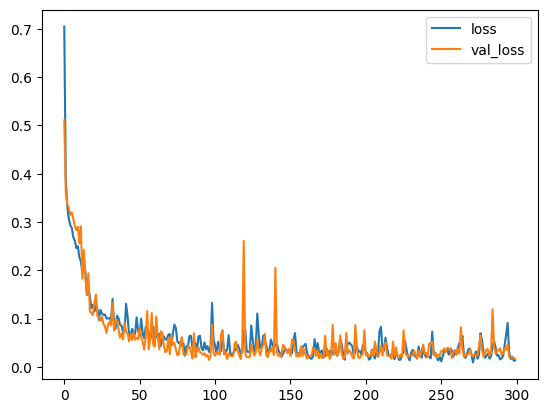

In [21]:
import matplotlib.pyplot as plt

def plot_model_history(history):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(history.history['loss'])
    axes.plot(history.history['val_loss'])
    axes.legend(['loss', 'val_loss'])

plot_model_history(history)


In [22]:
model.save('model_K.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from sklearn.metrics import confusion_matrix

test_y_encode = np.argmax(test_y, axis=1)
pred_y_encode = np.argmax(model.predict(test_x), axis=1)

confusion_matrix(test_y_encode, pred_y_encode)

20/20 [==============================] - 0s 2ms/step


array([[ 13,   0,   0,   0],
       [  0,  23,   0,   0],
       [  0,   0, 433,   0],
       [  0,   2,   0, 150]])